In [6]:
import numpy as np
import torch as th
import torch.utils.data as data
import matplotlib.pyplot as plt 
from torch.distributions.uniform import Uniform

from simulator import gaussian_simulator
from Emulator import EmulatorNet
from train import train_network
from utils import create_dataloader
from active_learning import snle_ensemble

In [7]:
np.random.seed(10)
th.manual_seed(10)

In [8]:
print('hello')

hello


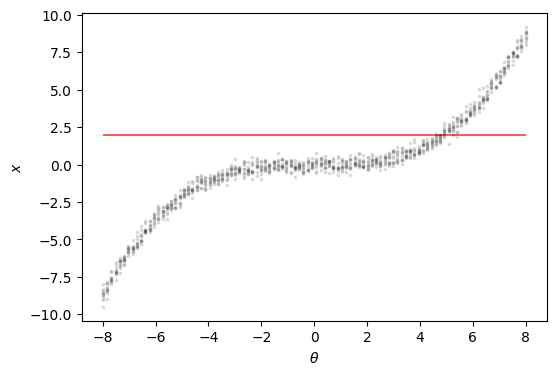

In [11]:
fig, ax = plt.subplots(figsize=(6, 4))

for theta in np.linspace(-8, 8, 100):
    x = gaussian_simulator(theta, n=10)
    ax.scatter(theta.repeat(len(x)), x, c='black', alpha=.1, s=3)
    ax.set_xlabel(r'$\theta$')
    ax.set_ylabel(r'$x$')

    plt.plot([-8, 8],[2, 2], color='red', linewidth=.1, alpha=.1)

plt.show()

In [ ]:
prior = Uniform(-8, 8)
train_batch_size = 200
lr = .01
epochs = 250
valid_rate = 50

# construct trainging set
train_size = 10000
train_batch_size = 50
theta_train = th.Tensor(prior.sample(sample_shape=(train_size,)))
x_train = th.Tensor(np.array([gaussian_simulator(t) for t in theta_train]).squeeze())
trainloader = create_dataloader(theta_train, x_train, batch_size=train_batch_size)

# construct validation set
valid_size = 1000
theta_valid = th.Tensor(prior.sample(sample_shape=(valid_size,)))
x_valid = th.Tensor(np.array([gaussian_simulator(t) for t in theta_valid]).squeeze())
valid_dataset = (theta_valid, x_valid)

#emulator = EmulatorNet()
#optimizer = th.optim.Adam(emulator.parameters(), lr=lr)
emulator, avg_train_losses, avg_valid_losses = train_network(trainloader, valid_dataset=valid_dataset, validation_rate=valid_rate, epochs=epochs)

In [14]:
x, y = validset

ValueError: too many values to unpack (expected 2)

(tensor([4.0905]), tensor(1.0083))

[]

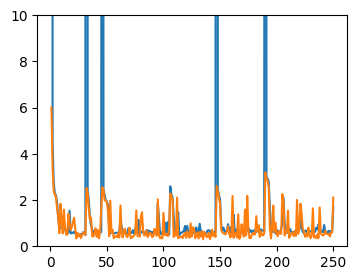

In [ ]:
fig, ax = plt.subplots(figsize=(4, 3))

ax.plot(avg_train_losses[:,0], avg_train_losses[:,1])
ax.plot(avg_valid_losses[:,0], avg_valid_losses[:,1])
ax.set_ylim((0, 10))

plt.plot()

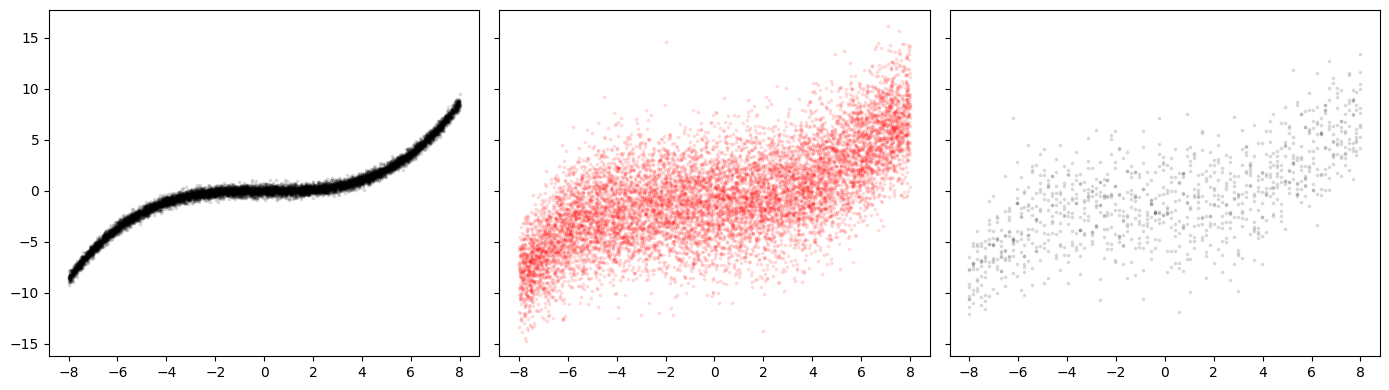

In [8]:
fig, ax = plt.subplots(figsize=(14, 4), ncols=3, sharex=True, sharey=True)
ax[0].scatter(theta_train, x_train, c='black', alpha=.1, s=3)

predictions=[]
for theta in theta_train:
    x_pred = emulator(theta.unsqueeze(-1)).sample()
    predictions.append(x_pred)

ax[1].scatter(theta_train, predictions, c='red', alpha=.1, s=3)

n_samples = 10 
for theta in th.linspace(-8, 8, 100):
    dist = emulator(theta.unsqueeze(-1))
    samples = dist.sample((n_samples,))
    ax[2].scatter(theta.repeat(n_samples), samples, c='black', alpha=.1, s=3)

plt.tight_layout()
plt.show()

In [7]:
# define parameters for training 
training_parameters = {
    'x_obs': th.Tensor([2]),
    'prior': Uniform(-8, 8),
    'n_rounds': 3,
    'n_emulators': 3,
    'train_size': 1000,
    'valid_size': 25,
    'train_batch_size': 5,
    'train_n_epochs': 250,
    'al_n_samples': 50,
    'al_batch_size': 5,
    'al_n_epochs': 100,
    'lr': .01
}

ensemble, ensemble_loss, all_likelihood = snle_ensemble(*training_parameters.values())

training initial ensemble...


100%|██████████| 3/3 [02:37<00:00, 52.63s/it]


initial training complete!

running active learning loop...


100%|██████████| 3/3 [00:09<00:00,  3.19s/it]


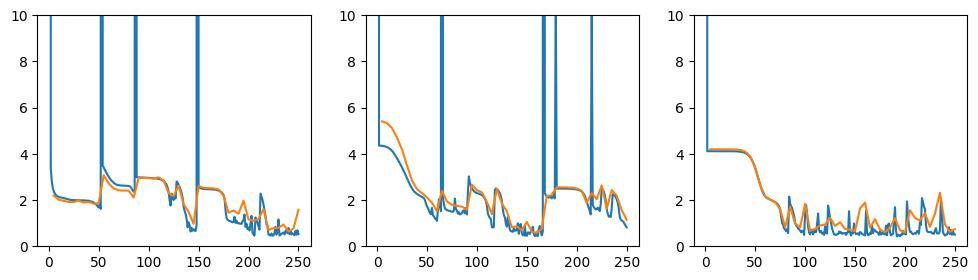

In [8]:
fig,ax = plt.subplots(figsize=(12,3), ncols=3)

for i in range(3):

    tl, vl = ensemble_loss[i]
    tl = tl
    vl = vl

    ax[i].plot(tl[:,0], tl[:,1])
    ax[i].plot(vl[:,0], vl[:,1])
    ax[i].set_ylim([0, 10])

plt.show()

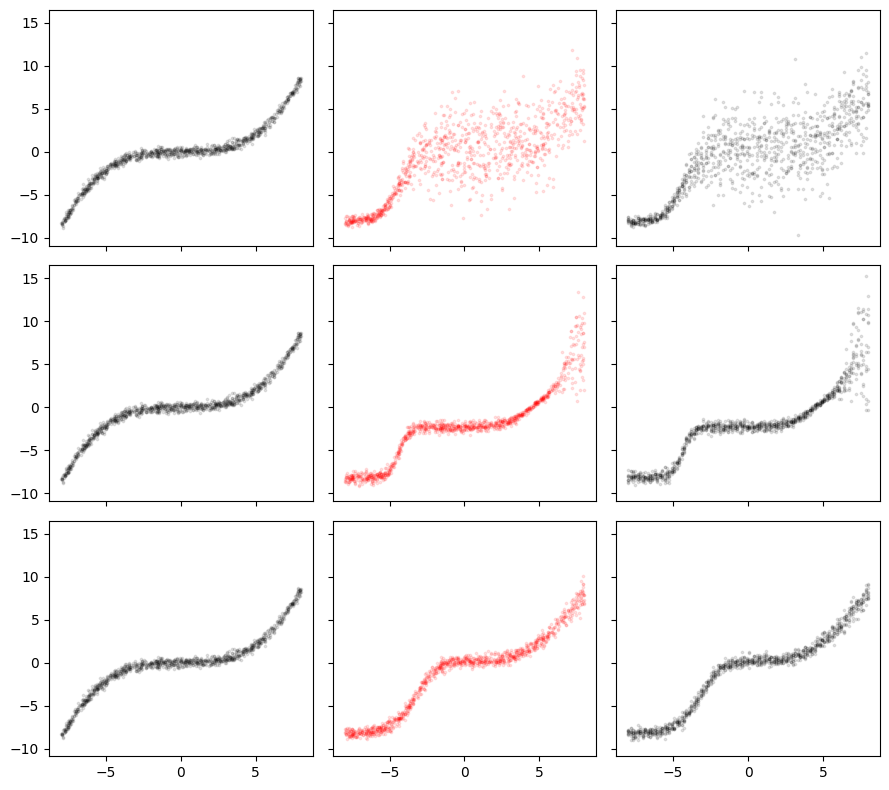

In [9]:
fig, ax = plt.subplots(figsize=(9, 8), nrows=training_parameters['n_emulators'], ncols=3, sharex=True, sharey=True)

for i,emulator in enumerate(ensemble):
    ax[i][0].scatter(theta_train, x_train, c='black', alpha=.1, s=3)

    predictions=[]
    for theta in theta_train:
        x_pred = emulator(theta.unsqueeze(-1)).sample()
        predictions.append(x_pred)

    ax[i][1].scatter(theta_train, predictions, c='red', alpha=.1, s=3)

    n_samples = 10 
    for theta in th.linspace(-8, 8, 100):
        dist = emulator(theta.unsqueeze(-1))
        samples = dist.sample((n_samples,))
        ax[i][2].scatter(theta.repeat(n_samples), samples, c='black', alpha=.1, s=3)

plt.tight_layout()
plt.show()

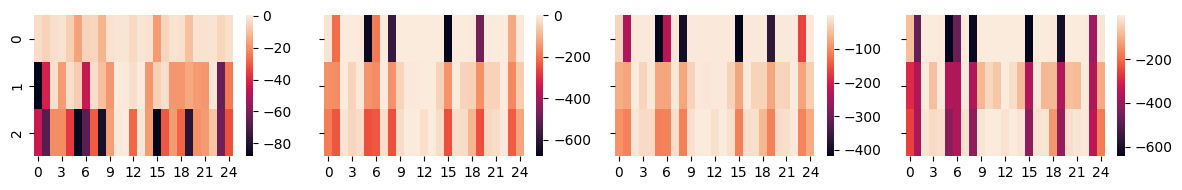

In [20]:
import seaborn as sns 

fig, ax = plt.subplots(figsize=(12,2), ncols=len(all_likelihood), sharex=True, sharey=True)

for i,matrix in enumerate(all_likelihood):
    sns.heatmap(matrix, ax=ax[i])

plt.tight_layout()
plt.show()

In [1]:
import matplotlib.pyplot as plt
tl = np.array(train_loss)

fig,ax = plt.subplots()

ax.plot(tl[:,0], tl[:,1])
ax.set_ylim([0, 10])
plt.show()

NameError: name 'np' is not defined

In [2]:
tl

NameError: name 'tl' is not defined